In [62]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from util_Matt import Util
from scipy.optimize import curve_fit

In [27]:
###### read data
dir_out = 'output/'
fnames = ['flat_mirror.h5', '13nm_heat_bump.h5', '131nm_heat_bump.h5']
labels = ['flat', '13 nm', '131 nm']
mirror_x = []
mirror_y = []
mirror_h = []

axis_x = []
axis_y = []
axis_z = []

slice_x = []
slice_y = []

for fname in fnames:
    with h5py.File(dir_out+fname, 'r') as f:
        mirror_x.append(f['lens_x'][:])
        mirror_y.append(f['lens_y'][:])
        mirror_h.append(f['lens_h'][:])
        axis_x.append(f['axis_x'][:])
        axis_y.append(f['axis_y'][:])
        axis_z.append(f['axis_z'][:])
        slice_x.append(f['slice_x'][:])
        slice_y.append(f['slice_y'][:])



flat, focus x: z=821.64mm, focus y: z=20.04mm
13nm, focus x: z=-116.23mm, focus y: z=-20.04mm
131nm, focus x: z=-52.1mm, focus y: z=172.34mm


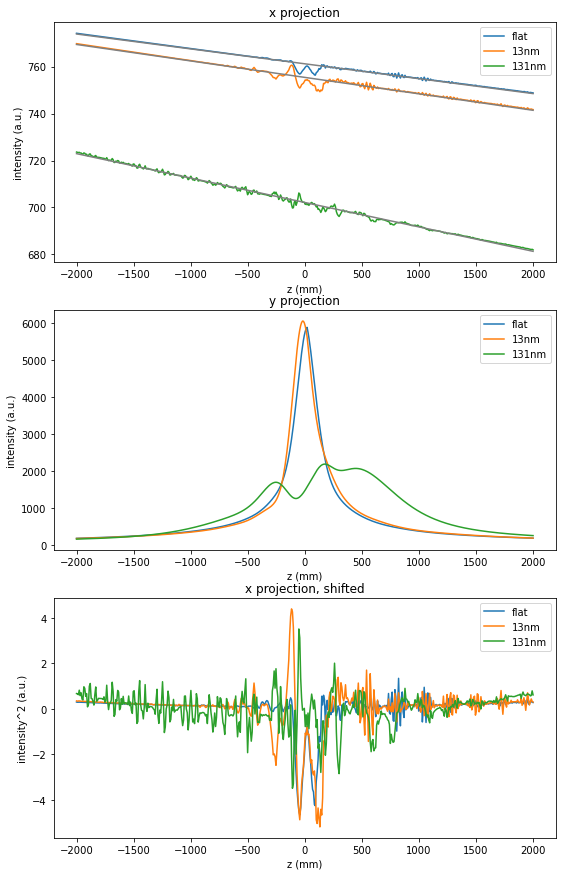

In [96]:
###### astigmatism
def fit_line(x, A, B):
    return A*x + B

fig = plt.figure(figsize=(9,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

int_list_x = []
int_list_y = []

focus_x = []
focus_y = []

for i in range(len(fnames)):
    # data
    x = axis_x[i]*1e3; y = axis_y[i]*1e3; z = axis_z[i]*1e3
    nx = x.size; ny = y.size; nz = z.size
    # int_x = slice_x[i][:,int(nx/2)]; int_y = slice_y[i][:,int(ny/2)]; label = labels[i] # central slice
    int_x = slice_x[i].sum(axis=1); int_y = slice_y[i].sum(axis=1); label = labels[i] # projection
    
    # calculation
    popt, pcov = curve_fit(fit_line, z, int_x)
    baseline_x = popt[0]*z + popt[1]
    
    # plots
    ax1.plot(z, int_x, label=label)
    ax1.plot(z, baseline_x, color='grey')
    ax2.plot(z, int_y, label=label)
    shape = int_x-baseline_x
    ax3.plot(z, shape, label=label)
    
    # focal distance
    focus_x.append(z[shape.argmax()])
    focus_y.append(z[int_y.argmax()])

ax1.set_xlabel('z (mm)')
ax1.set_ylabel('intensity (a.u.)')
ax1.legend()
ax1.set_title('x projection')

ax2.set_xlabel('z (mm)')
ax2.set_ylabel('intensity (a.u.)')
ax2.legend()
ax2.set_title('y projection')

ax3.set_xlabel('z (mm)')
ax3.set_ylabel('intensity^2 (a.u.)')
ax3.legend()
ax3.set_title('x projection, shifted')

for i, name in enumerate(labels):
    print('{}, focus x: z={}mm, focus y: z={}mm'.format(name, round(focus_x[i],2), round(focus_y[i],2)))

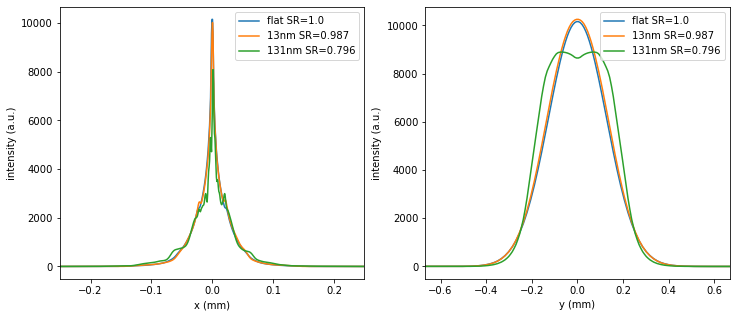

In [81]:
###### plot data (projection)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

int_list_x = []
int_list_y = []

for i in range(len(fnames)):
    int_x = slice_x[i].sum(axis=0); int_y = slice_y[i].sum(axis=0); label1 = labels[i]; label2 = label1
    x = axis_x[i]*1e3; y = axis_y[i]*1e3
    int_list_x.append(int_x.max())
    int_list_y.append(int_x.max())
    
    if label != 'flat':
        label1 += ' SR={}'.format(round(int_list_x[i]/int_list_x[0],3))
        label2 += ' SR={}'.format(round(int_list_y[i]/int_list_y[0],3))
    ax1.plot(x, int_x, label=label1)
    ax2.plot(y, int_y, label=label2)
    

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('intensity (a.u.)')
ax1.set_xlim([-1/4,1/4])
ax1.legend()
ax2.set_xlabel('y (mm)')
ax2.set_ylabel('intensity (a.u.)')
ax2.set_xlim([-2/3,2/3])
ax2.legend()



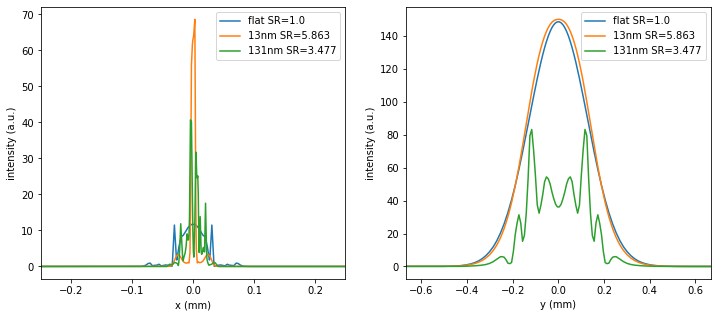

In [116]:
###### plot data (focal plane lineout)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

int_list_x = []
int_list_y = []

for i in range(len(fnames)):
    int_x = slice_x[i][np.where(z == focus_x[i])][0]; int_y = slice_y[i][np.where(z == focus_y[i])][0]; label1 = labels[i]; label2 = label1
    x = axis_x[i]*1e3; y = axis_y[i]*1e3
    int_list_x.append(int_x.max())
    int_list_y.append(int_x.max())
    
    if label != 'flat':
        label1 += ' SR={}'.format(round(int_list_x[i]/int_list_x[0],3))
        label2 += ' SR={}'.format(round(int_list_y[i]/int_list_y[0],3))
    ax1.plot(x, int_x, label=label1)
    ax2.plot(y, int_y, label=label2)
    

ax1.set_xlabel('x (mm)')
ax1.set_ylabel('intensity (a.u.)')
ax1.set_xlim([-1/4,1/4])
ax1.legend()
ax2.set_xlabel('y (mm)')
ax2.set_ylabel('intensity (a.u.)')
ax2.set_xlim([-2/3,2/3])
ax2.legend()

